In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/2)%20Classification%20Models/Random%20Forest%20Classification/Impact_of_Remote_Work_on_Mental_Health.csv"

--2024-11-27 14:45:00--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/2)%20Classification%20Models/Random%20Forest%20Classification/Impact_of_Remote_Work_on_Mental_Health.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 598566 (585K) [text/plain]
Saving to: ‘Impact_of_Remote_Work_on_Mental_Health.csv’

Impact_of_Remote_Wo 100%[===================>] 584.54K  --.-KB/s    in 0.05s   

2024-11-27 14:45:00 (11.9 MB/s) - ‘Impact_of_Remote_Work_on_Mental_Health.csv’ saved [598566/598566]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv('/content/Impact_of_Remote_Work_on_Mental_Health.csv')
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [5]:
data.isna().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


In [6]:
data.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [7]:
missing_col = ['Mental_Health_Condition','Physical_Activity']

In [8]:
imputer = SimpleImputer(strategy='most_frequent')
data[missing_col] = imputer.fit_transform(data[missing_col])

In [9]:
data.isna().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


In [10]:
numerical_columns = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
                     'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
                     'Social_Isolation_Rating', 'Company_Support_for_Remote_Work']

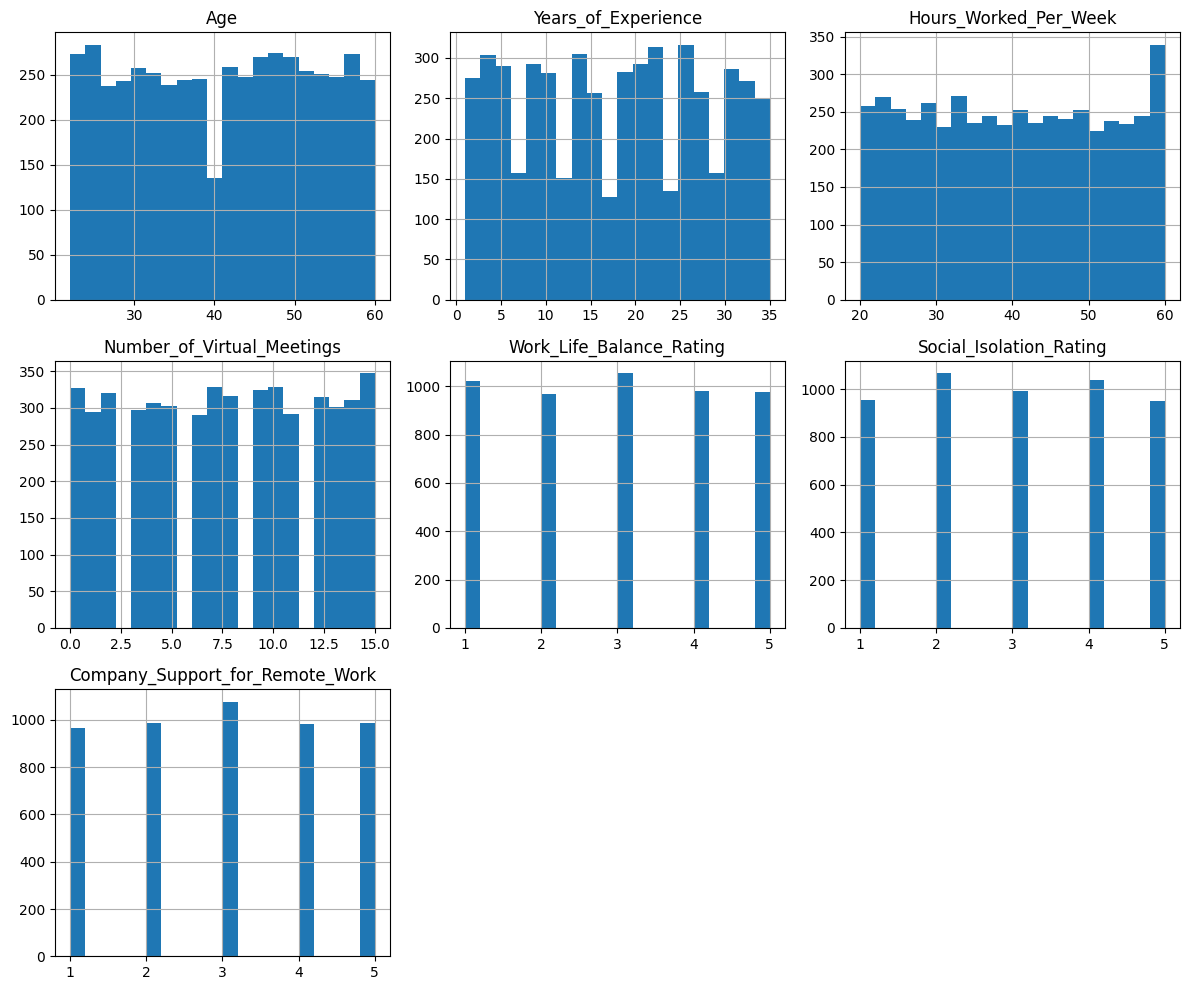

In [11]:
data[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

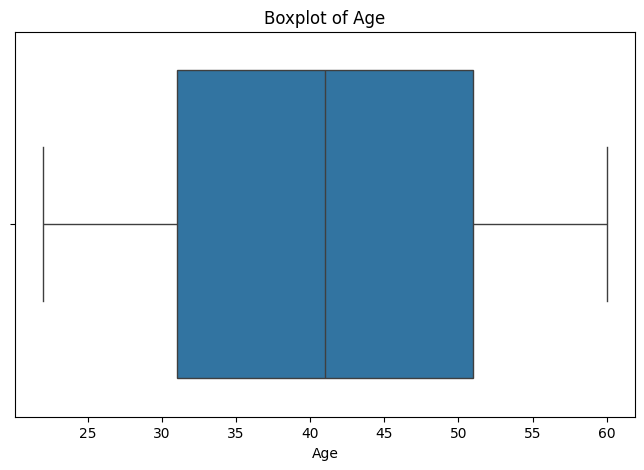

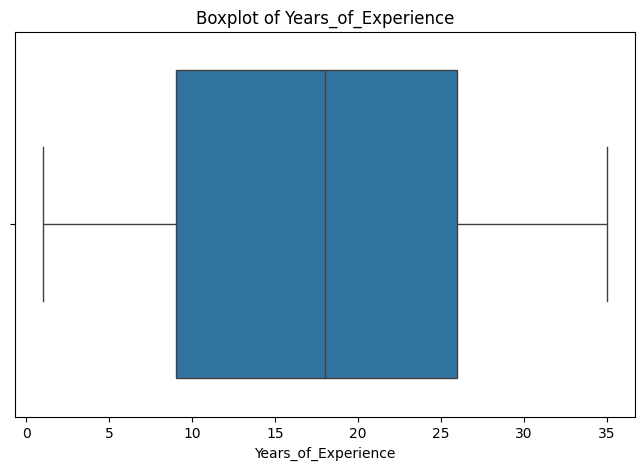

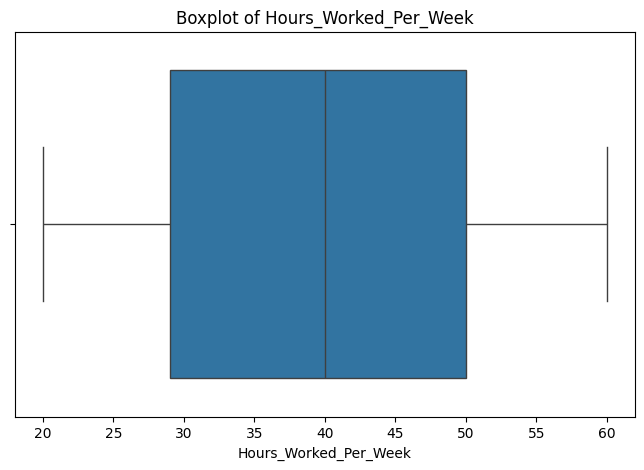

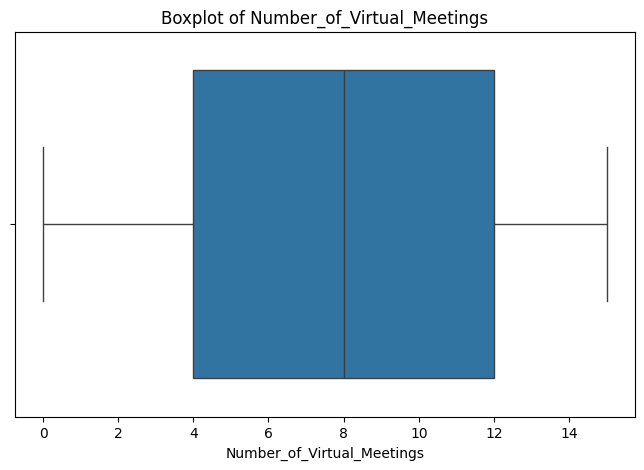

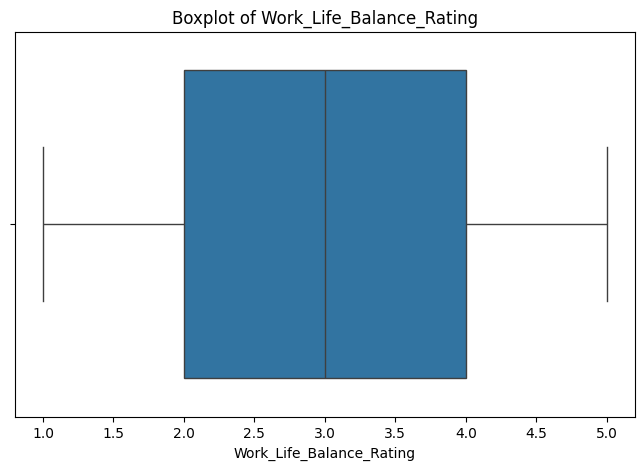

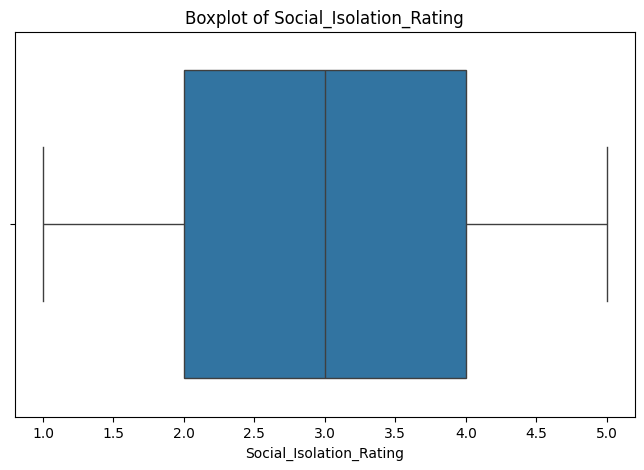

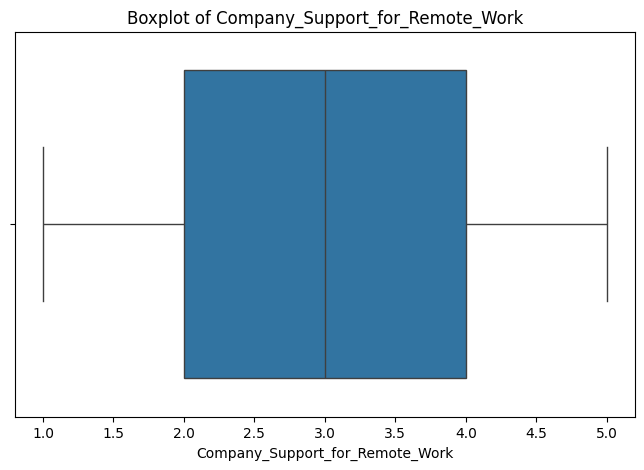

In [12]:
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

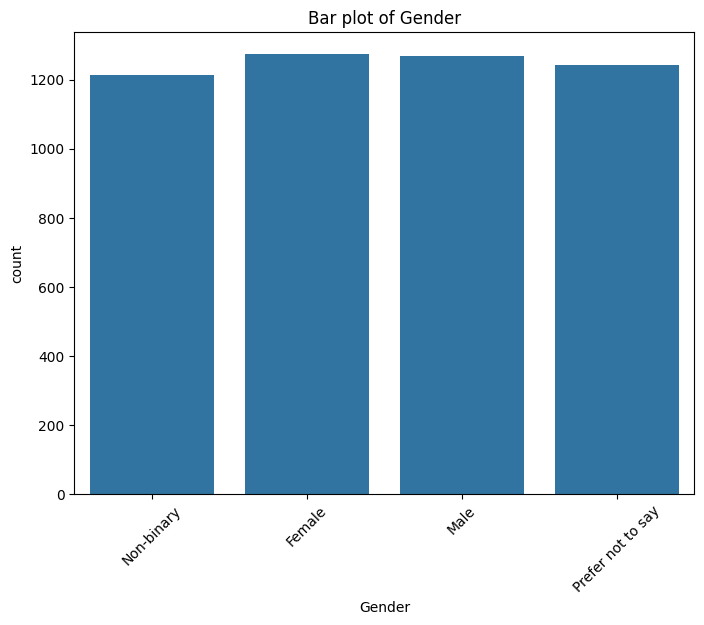

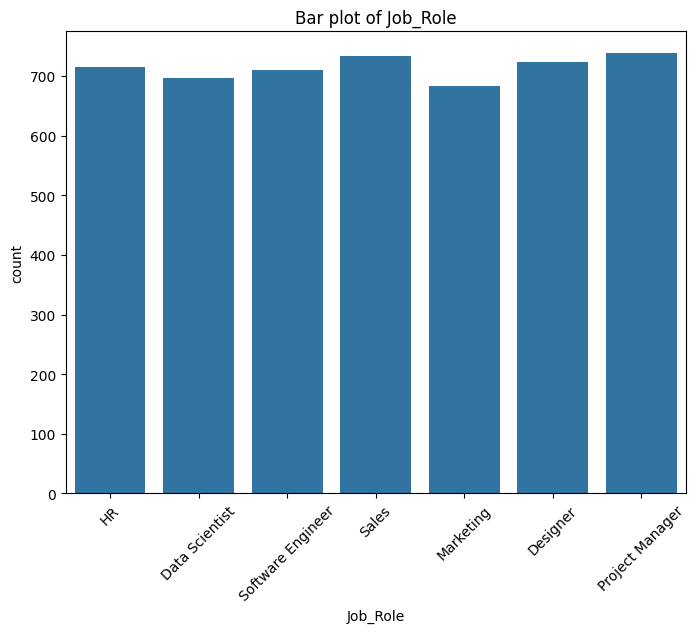

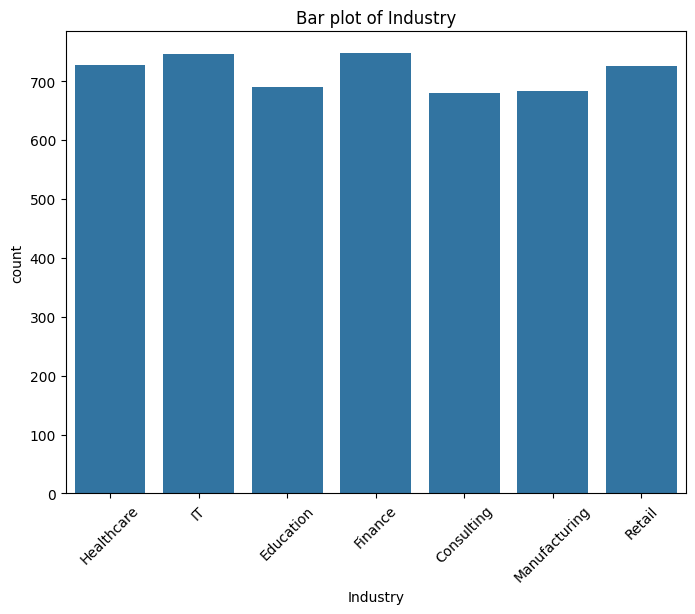

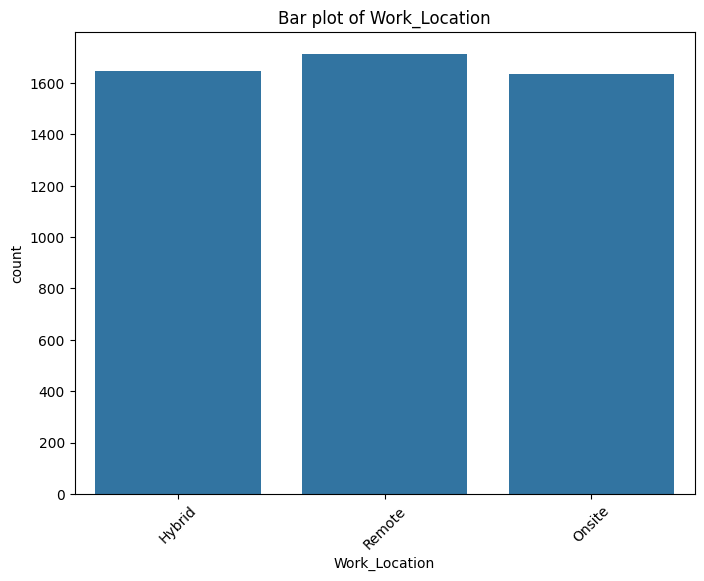

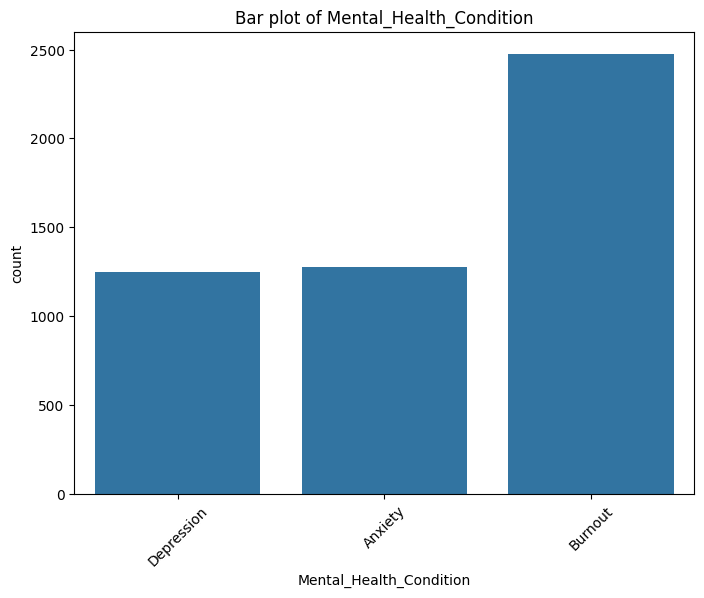

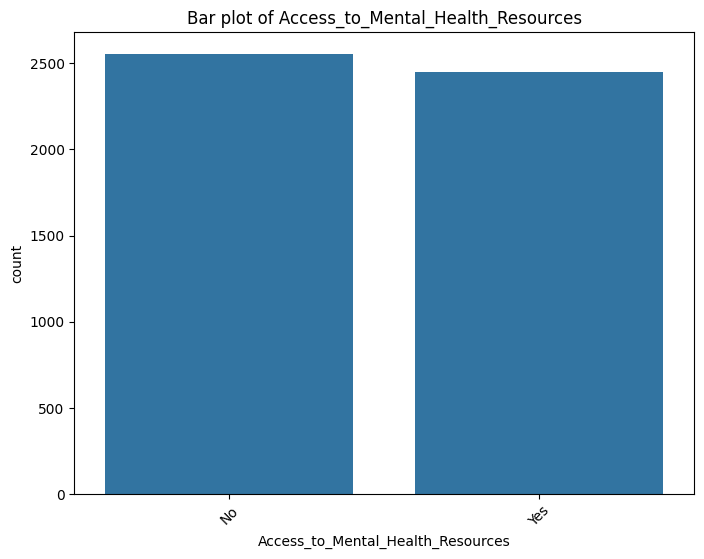

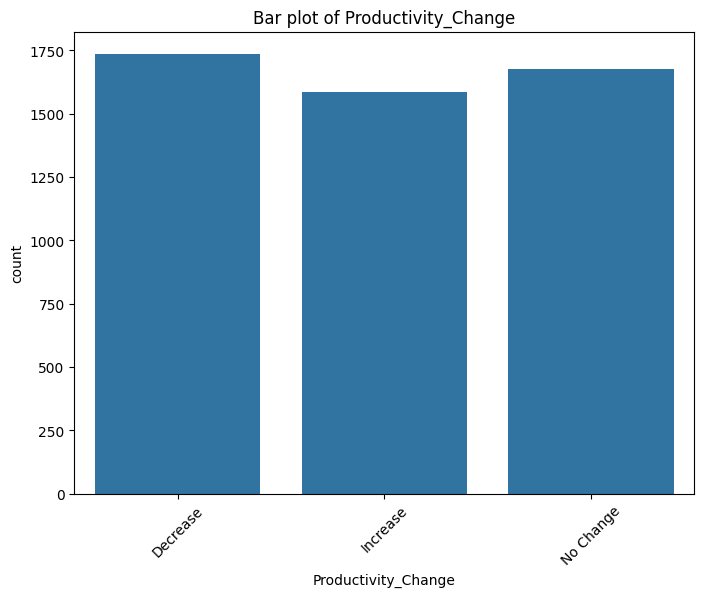

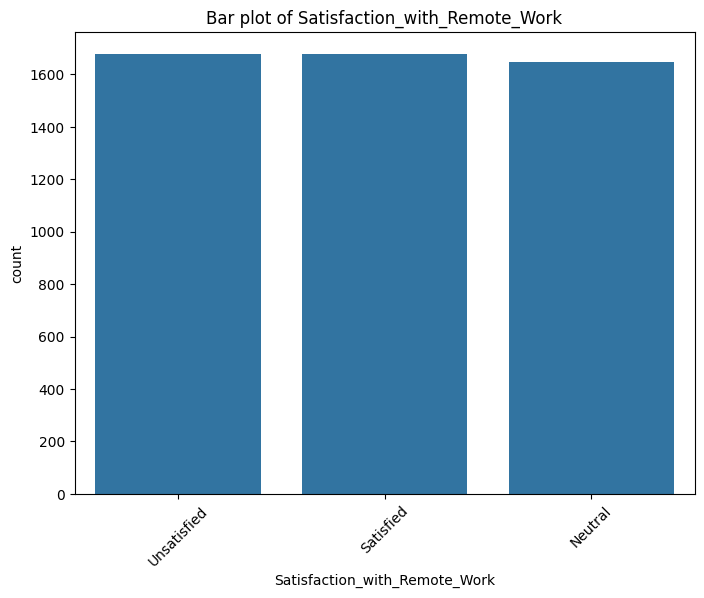

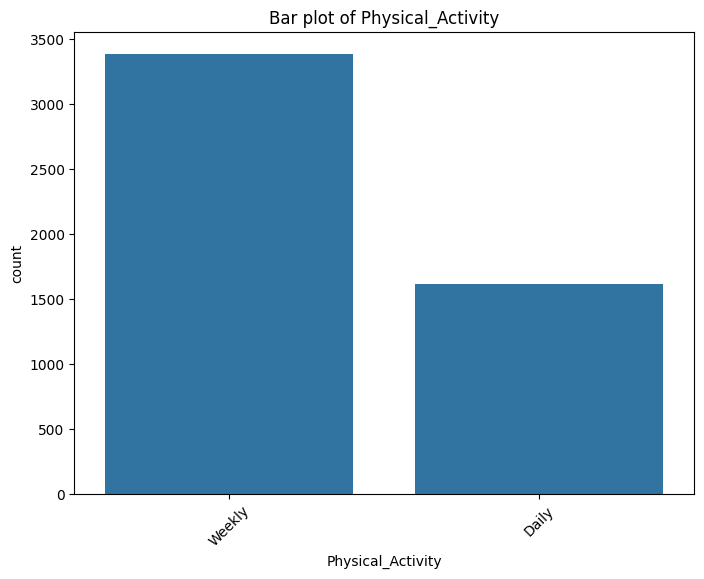

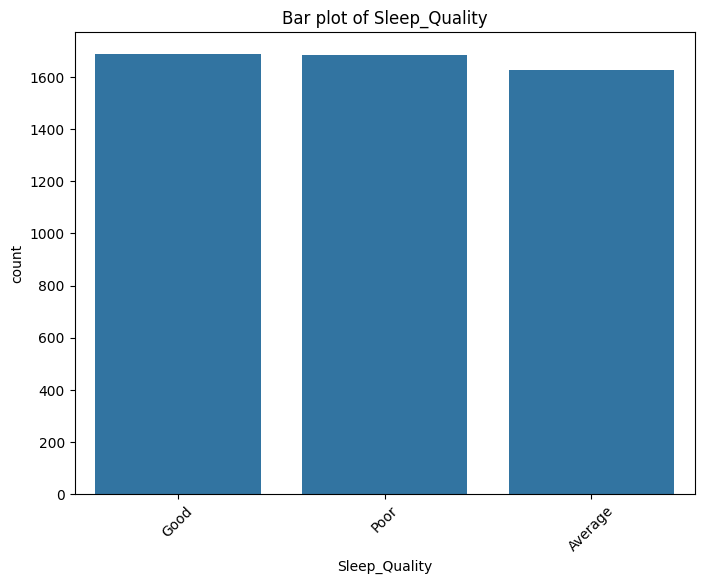

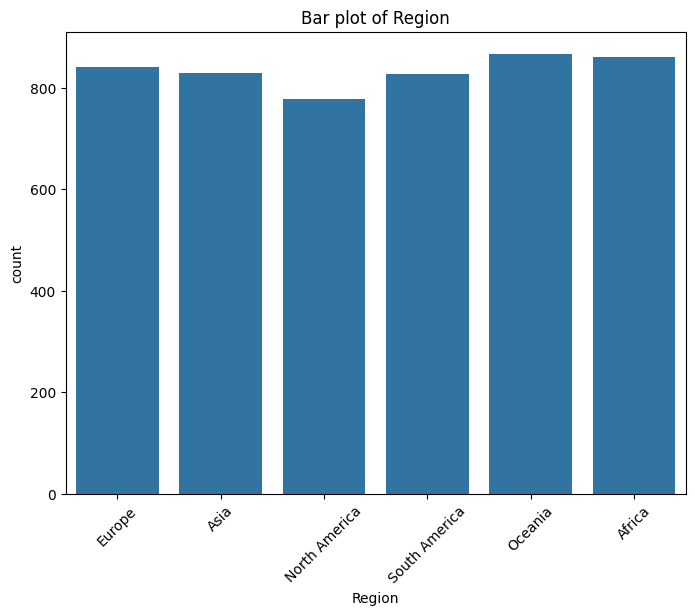

In [13]:
categorical_columns = ['Gender', 'Job_Role', 'Industry', 'Work_Location',
                       'Mental_Health_Condition', 'Access_to_Mental_Health_Resources',
                       'Productivity_Change', 'Satisfaction_with_Remote_Work',
                       'Physical_Activity', 'Sleep_Quality', 'Region']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Bar plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

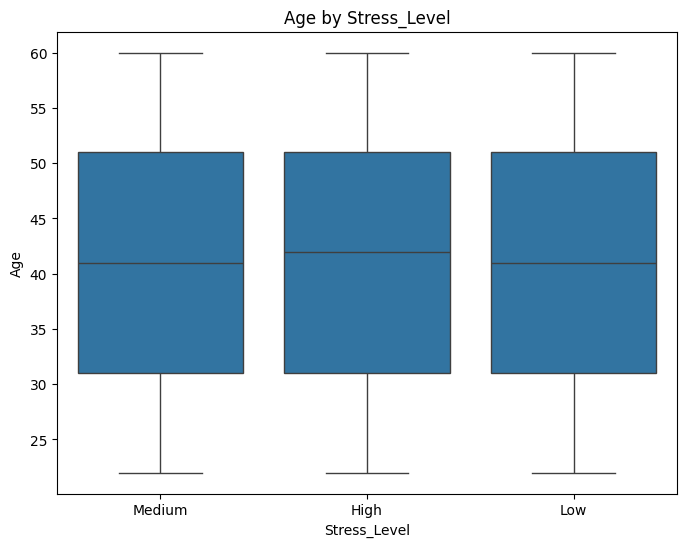

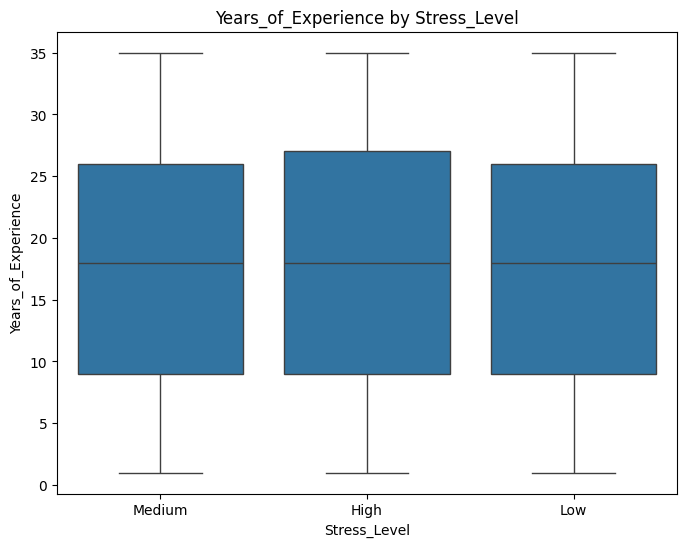

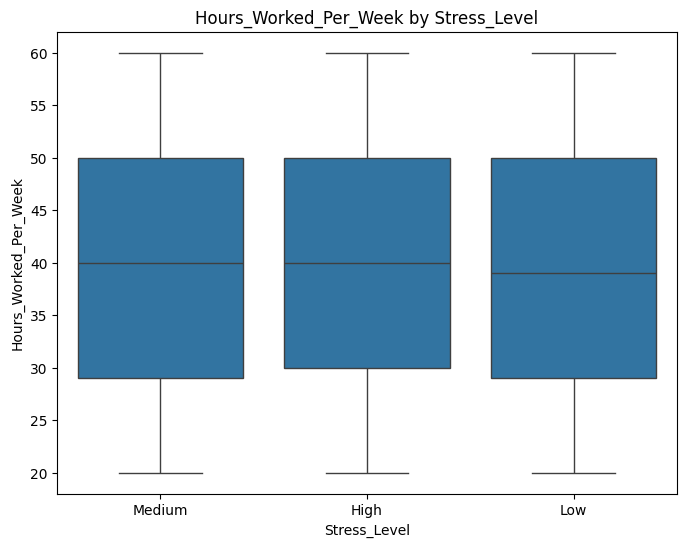

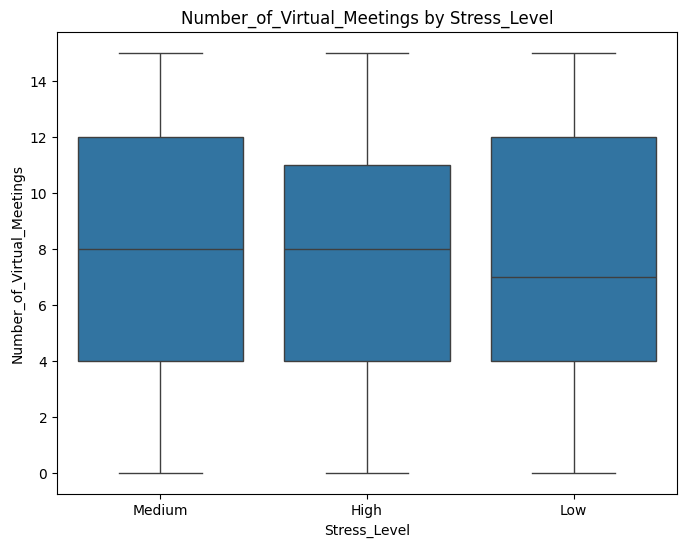

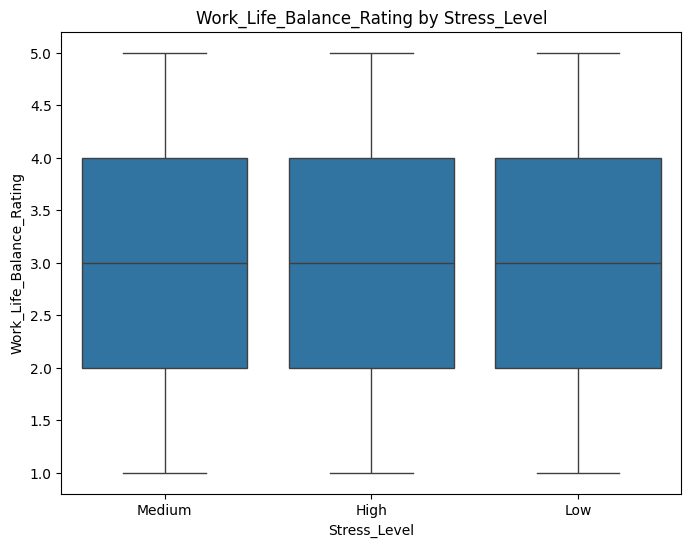

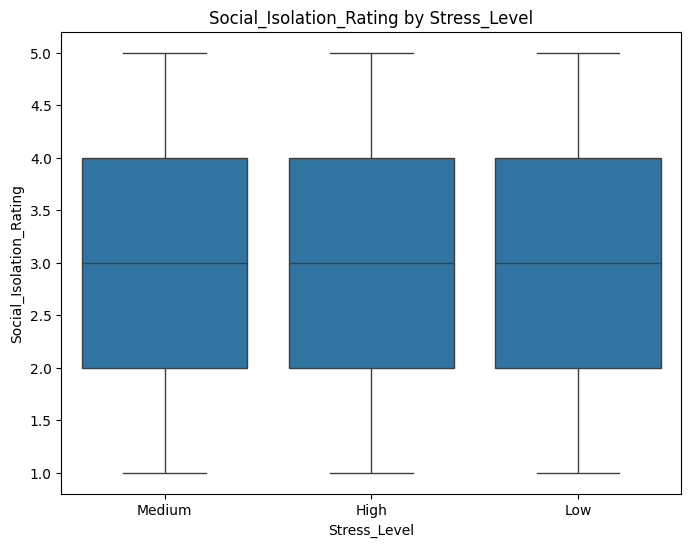

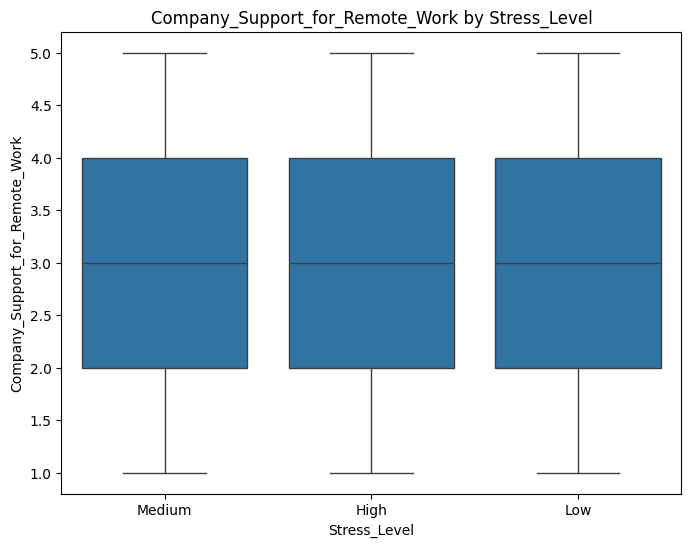

In [14]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Stress_Level', y=col, data=data)
    plt.title(f'{col} by Stress_Level')
    plt.show()

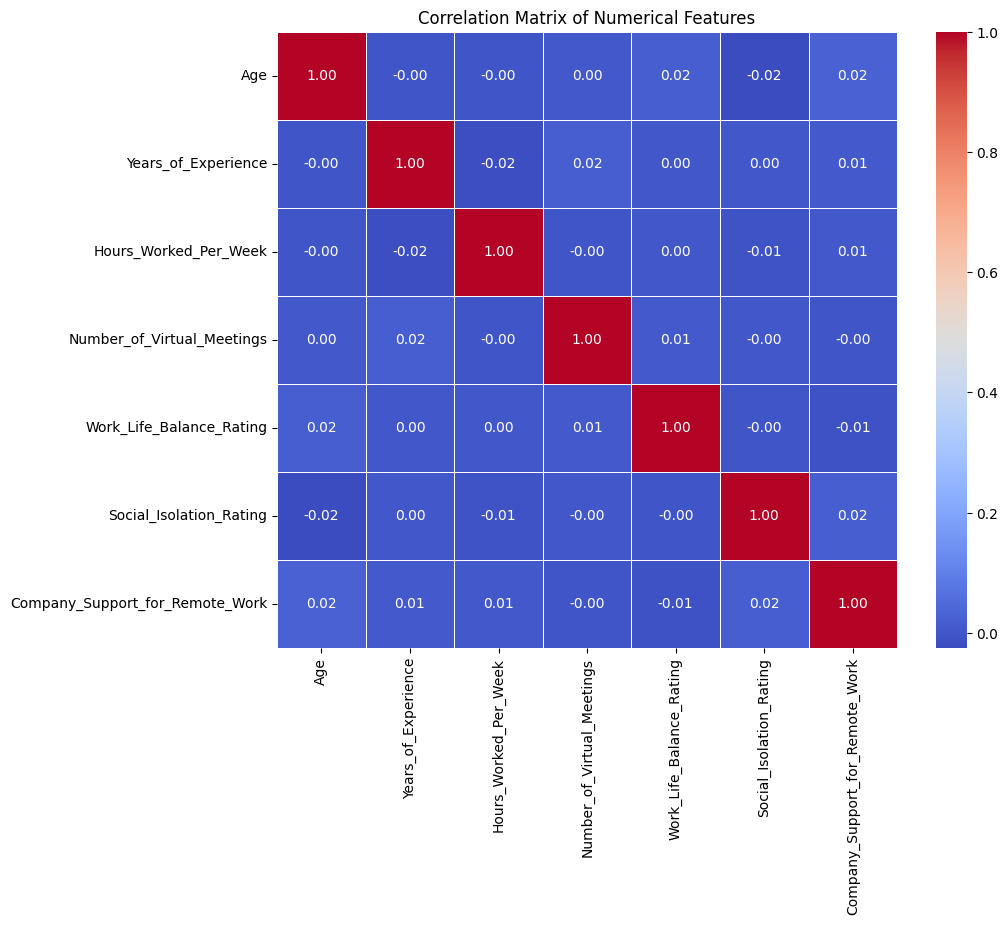

In [15]:
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [16]:
ordinal_columns = ['Work_Life_Balance_Rating']

In [17]:
X = data.drop(columns=['Employee_ID', 'Stress_Level'])
y = data['Stress_Level']

In [18]:
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(drop='first')

In [19]:
label = LabelEncoder()
y = label.fit_transform(y)

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder, ordinal_columns),
        ('nominal', onehot_encoder, categorical_columns)
    ])


In [21]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Work_Life_Balance_Rating']),
                                                 ('nominal',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Job_Role',
                                                   'Industry', 'Work_Location',
                                                   'Mental_Health_Condition',
                                                   'Access_to_Mental_Health_Resources',
                                                   'Productivity_Change',
                                                   'Satisfaction_with_Remote_Work',
                                                   'Physical_Activity',
                                                   'Sleep_Quality',
                                                   'Region'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [24]:
y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.3310


In [26]:
cm = confusion_matrix(y_test, y_pred)

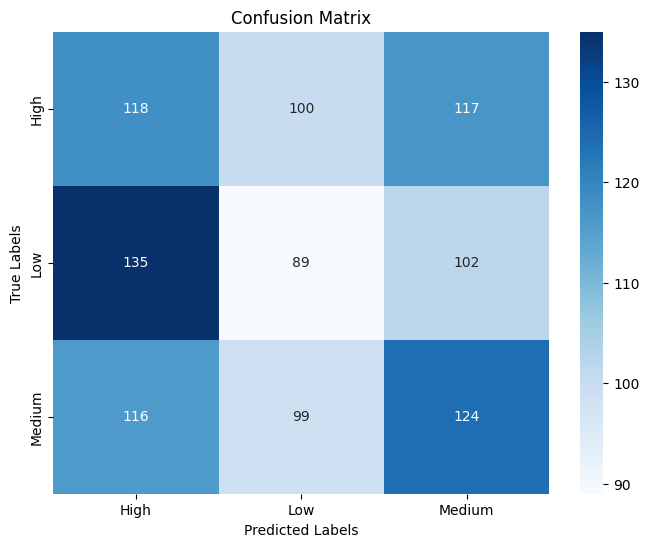

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  xticklabels=label.classes_, yticklabels=label.classes_)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [28]:
report = classification_report(y_test, y_pred, target_names=label.classes_)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        High       0.32      0.35      0.34       335
         Low       0.31      0.27      0.29       326
      Medium       0.36      0.37      0.36       339

    accuracy                           0.33      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.33      0.33      0.33      1000

